### ไวร์เลสเร้าเตอร์ | ONU fiber 4 lan |                                            
##### TYPE 1 " ALWAY TURN ON 

## NO. 14 (Wireless_router) 
![image](https://raw.githubusercontent.com/skyfighter/iHEMS/master/Device/pic/router.png)

In [3]:
import pandas as pd
import MySQLdb
import numpy as np
import time
import datetime 
import random


d = 30
time_a = pd.date_range('2016-09-01 00:00:00', periods=5760*d, freq='15S')
# print time_a
time_b = pd.date_range('2016-09-01 00:00:14', periods=5760*d, freq='15S')
# print time_b

conn= MySQLdb.connect("localhost","conn","hems","collected_info")
c = conn.cursor()

conn1= MySQLdb.connect("localhost","conn","hems","device")
c1 = conn1.cursor()

####### set databases to empty #########
query_empty = """truncate table device.wireless_router""" 
c1.execute(query_empty)
print "device.wireless_router are Empty!!! \n"


query = "SELECT watt FROM collected_info.14_wireless_router WHERE no >= '%s' AND no <= '%s'; "% (0,1280)
df = pd.read_sql(query, conn)
# print df.watt[5]
i = 0
j = 0

while (j <= (5760*d)-1): 
    c1.execute("INSERT INTO device.wireless_router (Timestamp, watt) VALUES (%s, %s)",(time_b[j],df.watt[i]))
    conn1.commit()
    i+=1
    j+=1

    if (i >= len(df)):
        i = 0    
        print ".",
print '\nDONE!'        


device.wireless_router are Empty!!! 

. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 
DONE!


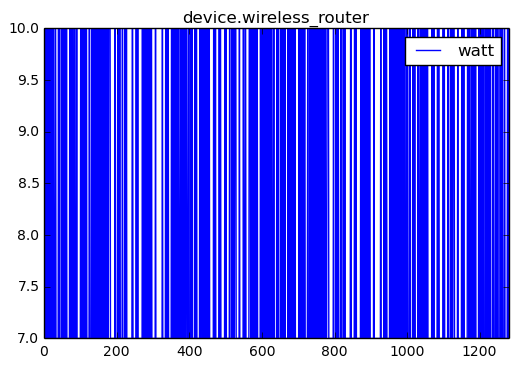

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline  


# query = "SELECT watt FROM device.refrigurator WHERE Timestamp >= '%s'   AND Timestamp <= '%s'; "% (time_a[0],time_b[j-1])
query = "SELECT watt FROM device.wireless_router WHERE Timestamp >= '%s'   AND Timestamp <= '%s'; "% (time_a[0],time_b[1280])
df = pd.read_sql(query, conn1)

fig, ax = plt.subplots()
ax.set_title('device.wireless_router')
df.plot(ax=ax )
plt.show()
